In [1]:
# importing Required Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
# Reading the Data
data=pd.read_csv("heart_failure.csv")

In [98]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [99]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

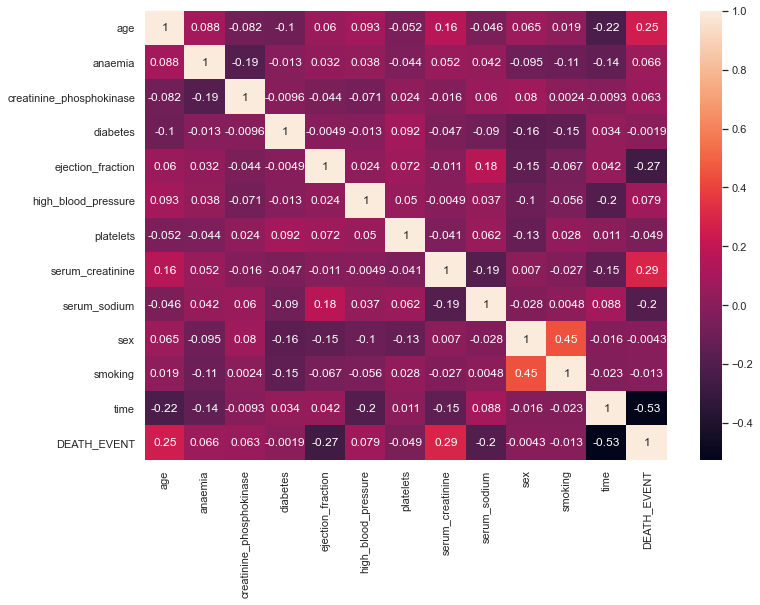

In [100]:
#Verifying The Correlation between Independent Variables
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(),annot=True)


All the variables are not highly correlated 

In [101]:
# Building a Logistic Regression Model
logreg=LogisticRegression()

In [102]:
# Performing Recursive Feature Elimination to Pick out Best Features available
rfe=RFE(logreg,5)

c:\users\arunt\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [103]:
y=data.pop("DEATH_EVENT")
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [104]:
model=rfe.fit(X_train,y_train)

c:\users\arunt\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\arunt\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [105]:
rfe.support_

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False, False])

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 3),
 ('anaemia', True, 1),
 ('creatinine_phosphokinase', False, 7),
 ('diabetes', True, 1),
 ('ejection_fraction', False, 2),
 ('high_blood_pressure', True, 1),
 ('platelets', False, 8),
 ('serum_creatinine', True, 1),
 ('serum_sodium', False, 6),
 ('sex', True, 1),
 ('smoking', False, 4),
 ('time', False, 5)]

In [107]:
# Fitting a Logistic Regression model to the train data
logreg.fit(X_train,y_train)

c:\users\arunt\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)

In [109]:
# Predicting it with the test data 
logreg.score(X_test,y_test)

0.8666666666666667

In [110]:

# Performing Logsistic Regresion using Stats models for better Statistical analysis
logml=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [111]:
#predicting Accuracy by removing columns 
for i in X_train.columns:
    X_train_df=X_train.drop(i,axis=1)
    X_test_df=X_test.drop(i,axis=1)
    logreg.fit(X_train_df,y_train)
    y_train_pred=logreg.predict(X_train_df)
    y_test_pred=logreg.predict(X_test_df)
    print(metrics.accuracy_score(y_test_pred, y_test), i)
    
    

0.85 age
0.8666666666666667 anaemia
0.85 creatinine_phosphokinase
0.8666666666666667 diabetes
0.85 ejection_fraction


c:\users\arunt\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8666666666666667 high_blood_pressure
0.9 platelets
0.8666666666666667 serum_creatinine
0.85 serum_sodium
0.8666666666666667 sex
0.8666666666666667 smoking
0.8166666666666667 time


c:\users\arunt\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\arunt\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [117]:
# Predicting Using KNN 
for i in range(1,10,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    Y_train_pred=neigh.predict(X_train)
    Y_test_pred=neigh.predict(X_test)
    print(neigh.score(X_test,y_test)," ",i)
    

0.5166666666666667   1
0.6166666666666667   3
0.6333333333333333   5
0.6333333333333333   7
0.6833333333333333   9


In [113]:
#Performing Random Forest Modeling
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [114]:
Y_test_pred=clf.predict(X_test)

In [116]:
clf.score(X_test,y_test)

0.9333333333333333

For the above methods, the accuracy is as follows :

Logistic Regression -> 86%
KNN                 -> 68 %
Random Forest       -> 93%

Random-Forest Fits the Model and becomes the best precdictor for the Heart Failure Data 